## Data Wrangling: Collecting and Cleaning Data

Data for this project is sourced from Kaggle at https://www.kaggle.com/lakshmikalyan/lead-scoring-x-online-education and contains simulated leads information created by UpGrad-IIIT-B for instructive purposes.



In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [91]:
leads_raw = pd.read_csv('Leads_X_Education.csv')

leads_raw.head(2)

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened


In [92]:
leads_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

First, I will rename the columns for easier manipulation.

After looking at the data dictionary, it is clear that most or all of the object-type columns are either categorical or boolean values. Additionally, many columns include the value 'Select' which represents a null value (the lead did not select an answer).

In [93]:
new_colnames = ['prospectID', 'lead_number', 'origin', 'source', 'no_email', 'no_call', 'converted', 'visits',
                'visit_time', 'visit_pages', 'last_activity', 'country', 'specialization', 'hear_about', 'occupation',
                'matters_most', 'search', 'magazine', 'news_article', 'forums', 'newspaper', 'digital_ad',
                'recommendations', 'updates', 'tags', 'quality', 'scc_updates', 'dm_updates', 'profile', 'city', 
                'activity_index', 'profile_index', 'activity_score', 'profile_score', 'cheque', 'mti_copy', 'last_notable']

rename_dict = dict(zip(leads_raw.columns, new_colnames))

leads = leads_raw.rename(rename_dict, axis=1)
leads.head(1)

,prospectID,lead_number,origin,source,no_email,no_call,converted,visits,visit_time,visit_pages,...,dm_updates,profile,city,activity_index,profile_index,activity_score,profile_score,cheque,mti_copy,last_notable
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified


In [94]:
leads = leads.replace('Select', np.nan);

In [95]:
leads.replace(('Yes', 'No'), (True, False), inplace=True)
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   prospectID       9240 non-null   object 
 1   lead_number      9240 non-null   int64  
 2   origin           9240 non-null   object 
 3   source           9204 non-null   object 
 4   no_email         9240 non-null   bool   
 5   no_call          9240 non-null   bool   
 6   converted        9240 non-null   int64  
 7   visits           9103 non-null   float64
 8   visit_time       9240 non-null   int64  
 9   visit_pages      9103 non-null   float64
 10  last_activity    9137 non-null   object 
 11  country          6779 non-null   object 
 12  specialization   5860 non-null   object 
 13  hear_about       1990 non-null   object 
 14  occupation       6550 non-null   object 
 15  matters_most     6531 non-null   object 
 16  search           9240 non-null   bool   
 17  magazine      

Let's check our dependent variable (converted), as well as each column's values to assess which features to drop

In [96]:
leads.converted.value_counts()

0    5679
1    3561
Name: converted, dtype: int64

In [97]:
for col in leads.columns:
    print(col, ':', leads[col].nunique())

prospectID : 9240
lead_number : 9240
origin : 5
source : 21
no_email : 2
no_call : 2
converted : 2
visits : 41
visit_time : 1731
visit_pages : 114
last_activity : 17
country : 38
specialization : 18
hear_about : 9
occupation : 6
matters_most : 3
search : 2
magazine : 1
news_article : 2
forums : 2
newspaper : 2
digital_ad : 2
recommendations : 2
updates : 1
tags : 26
quality : 5
scc_updates : 1
dm_updates : 1
profile : 5
city : 6
activity_index : 3
profile_index : 3
activity_score : 12
profile_score : 10
cheque : 1
mti_copy : 2
last_notable : 16


Prospect ID and Lead Number columns are both unique identifiers. For the purposes of this project, we do not need both.

In [98]:
leads.drop('prospectID', axis=1, inplace=True)

Five columns have only one unique value (and no null values), so they cannot help in our model and should be dropped.

In [99]:
onevalcols = ['magazine', 'updates', 'scc_updates', 'dm_updates', 'cheque']
leads.drop(onevalcols, axis=1, inplace=True)
leads.shape

(9240, 31)

Next, we'll go through each column and decide how to handle it. Let's work through the list by data type, since we will be performing similar operations on multiple columns of each type.

## Boolean Columns
Some of the bool type columns have such high uniformity that they are not useful. We'll check the value counts and drop irrelevant columns, with a cutoff of at least 5 'True' responses.

In [100]:
bools = leads.select_dtypes('bool')
for col in bools.columns:
    print(bools[col].value_counts(), '\n')

False    8506
True      734
Name: no_email, dtype: int64 

False    9238
True        2
Name: no_call, dtype: int64 

False    9226
True       14
Name: search, dtype: int64 

False    9238
True        2
Name: news_article, dtype: int64 

False    9239
True        1
Name: forums, dtype: int64 

False    9239
True        1
Name: newspaper, dtype: int64 

False    9236
True        4
Name: digital_ad, dtype: int64 

False    9233
True        7
Name: recommendations, dtype: int64 

False    6352
True     2888
Name: mti_copy, dtype: int64 



In [101]:
leads.drop(['no_call', 'news_article', 'forums', 'newspaper', 'digital_ad'],axis=1, inplace=True)

## Numerical Columns
We basically have two groups of numerical value columns with missing values in our dataset. The first includes visits and visit_pages, which describe leads' interactions with the website. Rather than imputing with the median, I think is it more reasonable to assume null values represent 0 (no value recorded if there were no page visits), which is also the mode of each of these columns. Of course this may depend on how the data was collected, and in a real-world scenario we should investigate why these values are missing. The column visit_time has no null values and needs no changes.

The second group includes activity_score and profile_score. Nearly half of the data is missing for these columns, yet the information we have could be extremely helpful. One way to handle the data is to impute missing values as 'Unknown' and treat the column as categorical. We will look closer at these values later.

In [102]:
leads.visits.replace(np.nan, 0, inplace=True)
leads.visit_pages.replace(np.nan, 0, inplace=True)

## Text (Categorical) Columns
For each column we will inspect the value counts and judge whether the column has enough useful information. If so, missing and low-count values (less than 10 entries) can be consolidated and relabeled as 'Other/Unknown'. We'll write a function to do this easily.

In [103]:
def add_other(column):
    """Takes a pd Series, relabels all null values and values with count less than 10 as 'Other/Unknown'"""
    # Replace NaN
    column = column.replace(np.nan, 'Other/Unknown')
    # Create list of categories to label as 'Other'
    other_cats = [val for val in column.unique() if column.value_counts()[val] < 10]
    # Some columns already include an 'Other' category, which we should include in our list
    other_cats.append('Other')    
    column = column.replace(other_cats, 'Other/Unknown')
    return column

def check_other(column):
    """Displays column values and percentage of 'Other/Unknown' values"""
    unknown_pct = round(column.value_counts()['Other/Unknown']/len(column)*100, 2)
    print(column.value_counts(), '\n\nPercent \'Other/Unknown\':', unknown_pct)

#### Lead Source

In [104]:
print(leads.source.value_counts(dropna=False))

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
NaN                    36
bing                    6
google                  5
Click2call              4
Live Chat               2
Social Media            2
Press_Release           2
blog                    1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
NC_EDM                  1
youtubechannel          1
WeLearn                 1
Name: source, dtype: int64


In [105]:
# 'Google' and 'google' are the same
leads.source.replace('google', 'Google', inplace=True)

leads.source = add_other(leads.source)

check_other(leads.source)

Google              2873
Direct Traffic      2543
Olark Chat          1755
Organic Search      1154
Reference            534
Welingak Website     142
Referral Sites       125
Other/Unknown         59
Facebook              55
Name: source, dtype: int64 

Percent 'Other/Unknown': 0.64


#### Last Activity

In [106]:
print(leads.last_activity.value_counts(dropna=False))

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
NaN                              103
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Resubscribed to emails             1
Visited Booth in Tradeshow         1
Name: last_activity, dtype: int64


In [107]:
leads.last_activity = add_other(leads.last_activity)
check_other(leads.last_activity)

Email Opened                 3437
SMS Sent                     2745
Olark Chat Conversation       973
Page Visited on Website       640
Converted to Lead             428
Email Bounced                 326
Email Link Clicked            267
Other/Unknown                 124
Form Submitted on Website     116
Unreachable                    93
Unsubscribed                   61
Had a Phone Conversation       30
Name: last_activity, dtype: int64 

Percent 'Other/Unknown': 1.34


#### Country

In [108]:
leads.country.value_counts(dropna=False)

India                   6492
NaN                     2461
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
Oman                       6
France                     6
unknown                    5
South Africa               4
Canada                     4
Germany                    4
Nigeria                    4
Kuwait                     4
Sweden                     3
Bangladesh                 2
Italy                      2
Philippines                2
Uganda                     2
Belgium                    2
Ghana                      2
China                      2
Asia/Pacific Region        2
Netherlands                2
Sri Lanka                  1
Malaysia                   1
Indonesia                  1
Vietnam                    1
Kenya                      1
Liberia       

In [109]:
leads.country = add_other(leads.country)
leads.country.value_counts()

India                   6492
Other/Unknown           2543
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Name: country, dtype: int64

#### Specialization
From the Data Dictionary: "The industry domain in which the customer worked before."

In [110]:
leads.specialization.value_counts(dropna=False)

NaN                                  3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Media and Advertising                 203
Travel and Tourism                    203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: specialization, dtype: int64

In [111]:
#No low-count columns to consolidate, only need to replace NaNs
leads.specialization.replace(np.nan, 'Unknown', inplace=True)
print("Percent Unknown:", round(3380/len(leads.specialization)*100, 2))

Percent Unknown: 36.58


#### How did you hear about X Education

In [112]:
leads.hear_about.value_counts(dropna=False)

NaN                      7250
Online Search             808
Word Of Mouth             348
Student of SomeSchool     310
Other                     186
Multiple Sources          152
Advertisements             70
Social Media               67
Email                      26
SMS                        23
Name: hear_about, dtype: int64

In [113]:
# This column has too many null values (in addition to 'Other') and must be dropped.
leads = leads.drop('hear_about', axis=1)

#### Current Occupation

In [114]:
leads.occupation.value_counts(dropna=False)

Unemployed              5600
NaN                     2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: occupation, dtype: int64

In [115]:
# Let's first include 'Businessman' within 'Working Professional' and 'Housewife' with 'Other'
leads.occupation.replace({'Businessman':'Working Professional', 'Housewife':'Other'}, inplace=True)
leads.occupation = add_other(leads.occupation)
check_other(leads.occupation)

Unemployed              5600
Other/Unknown           2716
Working Professional     714
Student                  210
Name: occupation, dtype: int64 

Percent 'Other/Unknown': 29.39


#### What matters most to you in choosing this course

In [116]:
leads.matters_most.value_counts(dropna=False)

Better Career Prospects      6528
NaN                          2709
Flexibility & Convenience       2
Other                           1
Name: matters_most, dtype: int64

In [117]:
# This column is not helpful because of high uniformity
leads = leads.drop('matters_most', axis=1)

#### Tags
From the Data Dictionary: "Tags assigned to customers indicating the current status of the lead."

This column's categories are difficult to understand without additional knowledge of the company and the methods used. For instance, the values 'Ringing', 'Busy', and 'switched off' sound possibly related to phone calls (and might therefore be consolidated into a category 'No Answer'), but I can't be sure. 

Other values seem like they would disqualify a lead from converting (eg. 'Lost to EINS', which I assume is a competitor, or 'Diploma holder (Not Eligible)') yet still include converted leads.

I will retain this column for our model, although I may not be able to use this feature to make any higher-level conclusion about how X Education could assign or seek out quality leads.

In [118]:
leads.tags.value_counts(dropna=False)

NaN                                                  3353
Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with 

In [119]:
leads.tags.replace(['invalid number', 'wrong number given', 'number not provided'], 'Invalid number', inplace=True)
leads.tags.replace(['Interested in other courses', 'Interested  in full time MBA'], 'Looking elsewhere', inplace=True)

leads.tags = add_other(leads.tags)
check_other(leads.tags)

Other/Unknown                          3390
Will revert after reading the email    2072
Ringing                                1203
Looking elsewhere                       630
Already a student                       465
Closed by Horizzon                      358
switched off                            240
Busy                                    186
Lost to EINS                            175
Invalid number                          157
Not doing further education             145
Graduation in progress                  111
Diploma holder (Not Eligible)            63
opp hangup                               33
in touch with EINS                       12
Name: tags, dtype: int64 

Percent 'Other/Unknown': 36.69


#### Lead Quality
From the Data Dictionary: "Indicates the quality of lead based on the data and intuition the the employee who has been assigned to the lead."

In [31]:
leads.quality.value_counts(dropna=False)

NaN                  4767
Might be             1560
Not Sure             1092
High in Relevance     637
Worst                 601
Low in Relevance      583
Name: quality, dtype: int64

In [32]:
# The intuition of the employee could be a great predictor, but unfortunately the high number of NaN and 'Not Sure' values 
# means this column is not useful. In the future I would encourage staff to complete this field for all leads.
leads = leads.drop('quality', axis=1)

#### Lead Profile
From the Data Dictionary: A lead level assigned to each customer based on their profile.

In [33]:
leads.profile.value_counts(dropna=False)

NaN                            6855
Potential Lead                 1613
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: profile, dtype: int64

In [34]:
# Again, too many NaN values makes the column unhelpful.
leads = leads.drop('profile', axis=1)

#### City

In [81]:
leads.city.value_counts(dropna=False)

NaN                            3669
Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: city, dtype: int64

In [82]:
# No low-value columns to consolidate.

leads.city.replace(np.nan, 'Unknown', inplace=True)
print(leads.city.value_counts())
print('\nPercent Unknown:', round(leads.city.value_counts()['Unknown']/len(leads.city)*100, 2))

Unknown                        3669
Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: city, dtype: int64

Percent Unknown: 39.71


#### Asymmetrique Activity/Profile Index
From the Data Dictionary: "An index and score assigned to each customer based on their activity and their profile"

This is a lead score that we are trying to improve upon with our model. This score might be very helpful, but needs some restructuring. The Activity Index corresponds to Score values: Low = 0-12, Medium = 13-15, High = 16=20. For the Profile Index, the value 16 is included in the 'Medium' category. However, this still seems inappropriate for the score column, as you can see in the graphs below.

Luckily, we can use the Profile Score column to reclassify the Profile Index categories. Then, we can drop the Activity and Profile Score columns, since the data already reflected in our indexes. We can then impute missing values as 'Medium'.

In [37]:
print(leads.activity_score.value_counts())
print(leads.activity_index.value_counts())

14.0    1771
15.0    1293
13.0     775
16.0     467
17.0     349
12.0     196
11.0      95
10.0      57
9.0        9
18.0       5
8.0        4
7.0        1
Name: activity_score, dtype: int64
02.Medium    3839
01.High       821
03.Low        362
Name: activity_index, dtype: int64


In [38]:
print(leads.profile_score.value_counts())
print(leads.profile_index.value_counts())

15.0    1759
18.0    1071
16.0     599
17.0     579
20.0     308
19.0     245
14.0     226
13.0     204
12.0      22
11.0       9
Name: profile_score, dtype: int64
02.Medium    2788
01.High      2203
03.Low         31
Name: profile_index, dtype: int64


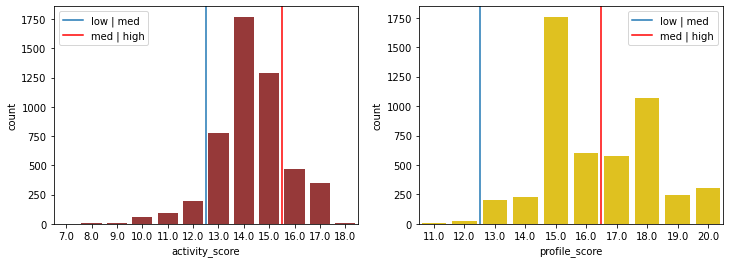

In [39]:
plt.figure(figsize=(12,4))
plt.subplot(1, 2, 1)
sns.countplot(x='activity_score', data=leads, color='brown')
plt.axvline(5.5, label='low | med')
plt.axvline(8.5, c='r', label='med | high')
plt.legend()

plt.subplot(1, 2, 2)
sns.countplot(x='profile_score', data=leads, color='gold')
plt.axvline(1.5, label='low | med')
plt.axvline(5.5, c='r', label='med | high')
plt.legend()
plt.show();

In [40]:
# A more appropriate Medium category for profile score would range from 15-17.
new_profile_index = []
for value in leads.profile_score:
    if value < 15:
        new_profile_index.append('Low')
    elif value > 17:
        new_profile_index.append('High')
    else:
        new_profile_index.append('Medium')

leads.profile_index = new_profile_index
leads.activity_index.replace(np.nan, 'Medium', inplace=True)

In [41]:
leads.activity_index.value_counts(dropna=False)

Medium       4218
02.Medium    3839
01.High       821
03.Low        362
Name: activity_index, dtype: int64

In [42]:
leads.profile_index.value_counts(dropna=False)

Medium    7155
High      1624
Low        461
Name: profile_index, dtype: int64

In [43]:
leads = leads.drop(['activity_score', 'profile_score'], axis=1)

#### Last Notable Activity

In [44]:
leads.last_notable.value_counts(dropna=False)

Modified                        3407
Email Opened                    2827
SMS Sent                        2172
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      47
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
View in browser link Clicked       1
Approached upfront                 1
Form Submitted on Website          1
Resubscribed to emails             1
Email Received                     1
Name: last_notable, dtype: int64

In [45]:
leads.last_notable = add_other(leads.last_notable)
check_other(leads.last_notable)

Modified                    3407
Email Opened                2827
SMS Sent                    2172
Page Visited on Website      318
Olark Chat Conversation      183
Email Link Clicked           173
Email Bounced                 60
Unsubscribed                  47
Unreachable                   32
Had a Phone Conversation      14
Other/Unknown                  7
Name: last_notable, dtype: int64 

Percent 'Other/Unknown': 0.08


## Double-checking

In [46]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   lead_number      9240 non-null   int64  
 1   origin           9240 non-null   object 
 2   source           9240 non-null   object 
 3   no_email         9240 non-null   bool   
 4   converted        9240 non-null   int64  
 5   visits           9240 non-null   float64
 6   visit_time       9240 non-null   int64  
 7   visit_pages      9240 non-null   float64
 8   last_activity    9240 non-null   object 
 9   country          9240 non-null   object 
 10  specialization   9240 non-null   object 
 11  occupation       9240 non-null   object 
 12  search           9240 non-null   bool   
 13  recommendations  9240 non-null   bool   
 14  tags             9240 non-null   object 
 15  city             9240 non-null   object 
 16  activity_index   9240 non-null   object 
 17  profile_index 